In [105]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier # 분류
# from sklearn.neighbors import KNeighborsRegressor  # 회귀-예측
from sklearn.linear_model import LinearRegression  # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import re

matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [106]:
from konlpy.tag import Okt

In [107]:
okt = Okt()
m_list = okt.pos("아버지 가방에 들어가신다.",stem=True) # stem : 어간추출
print(m_list)

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가다', 'Verb'), ('.', 'Punctuation')]


In [108]:
# pos :  말뭉치, 품사 튜플형태로 전달
# morphs : 모든 형태소 단위로 분리(말뭉치, 어간 추출)
# nouns : 명사만 추출

In [109]:
m_list = okt.morphs("한글 자연어 처리는 재밌다 이제부터 열심히 해야지 ㅎㅎㅎ"
                 , stem=True)  #
print(m_list)

['한글', '자연어', '처리', '는', '재밌다', '이제', '부터', '열심히', '하다', 'ㅎㅎㅎ']


In [110]:
m_list = okt.nouns("한글 자연어 처리는 재밌다 이제부터 열심히 해야지 ㅎㅎㅎ")  #
print(m_list)

['한글', '자연어', '처리', '이제']


In [111]:
df = pd.read_csv('review_data.csv')
df.head(3)

,score,review,y
0,5,新鮮でおいしいです。너무 맛있어요,1
1,4,녹는다 녹아,1
2,4,좋아요,1


In [112]:
# 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   score   372 non-null    int64 
 1   review  372 non-null    object
 2   y       372 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.8+ KB


In [113]:
df['y'].value_counts()  # target값의 수치도 적절하게 맞춰주는 것이 좋음  # 1-긍정 / 0-부정

y
1    222
0    150
Name: count, dtype: int64

In [114]:
df.head(20)

,score,review,y
0,5,新鮮でおいしいです。너무 맛있어요,1
1,4,녹는다 녹아,1
2,4,좋아요,1
3,5,흠잡을곳 없는 반찬이 정갈합니다,1
4,5,코로나 땜에 걱정했는데 방역수칙도 잘 지키시고 살치실이랑 등심 부드러워서 너무 좋아...,1
5,5,살치살 미쳤네요.. 대박입니다 퀄리티 굳이에요~,1
6,5,최고,1
7,5,"외식하기에 딱 좋습니다 격 자체가 다른 음식의 품격, 서비스마인드 뭐하나 흠잡을곳이...",1
8,5,한우살이 아주그냥 입에서 녹아요 한번왔는데 또오고싶은맛입니다.,1
9,5,최고예요,1


In [115]:
import re
# ^[a]{1} /[^]

# 빈공백, 한글을 제외하고 모든 문자는 제거
# 문자열을 정리
def test_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅎ가-힣]') # 빈공백, 한글 이 아닌 것 선택
    result = hangul.sub('', text)
    return result

In [116]:
df.columns

Index(['score', 'review', 'y'], dtype='object')

In [117]:
df['review'].head()

0                                    新鮮でおいしいです。너무 맛있어요
1                                               녹는다 녹아
2                                                  좋아요
3                                   흠잡을곳 없는 반찬이 정갈합니다 
4    코로나 땜에 걱정했는데 방역수칙도 잘 지키시고 살치실이랑 등심 부드러워서 너무 좋아...
Name: review, dtype: object

In [118]:
df['ko_text'] = df['review'].apply(lambda x: test_cleaning(x))
df['ko_text']
df

# 한글자 이상의 텍스트를 가지고 데이터 추출
df = df[df['ko_text'].str.len()>0]
df.shape

(372, 4)

In [119]:
# 형태소 단위분석
from konlpy.tag import Okt

# 형태소 분석 함수생성
def get_pos(x):
    tagger = Okt()
    pos = tagger.pos(x) # (단어,품사) 튜플
    pos = [ '{}/{}'.format(word,tag) for word, tag in pos]  # pos 튜플형태(단어, 품사)
    return pos

In [120]:
df['ko_text'].values[0]

'너무 맛있어요'

In [121]:
# 형태소 추출 테스트
result = get_pos(df['ko_text'].values[0])
result

['너무/Adverb', '맛있어요/Adjective']

In [122]:
# CountVectorizer : 전체단어에서 각 단어에 번호를 생성부여
from sklearn.feature_extraction.text import CountVectorizer

index_vectorizer = CountVectorizer(tokenizer=lambda x : get_pos(x))
X = index_vectorizer.fit_transform(df['ko_text'].to_list())

c:\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [123]:
# 형태소 분석이 된 단어 총 개수 - 2343개
X.shape

(372, 2343)

In [124]:
# 확인
index_vectorizer.vocabulary_

{'너무/Adverb': 411,
 '맛있어요/Adjective': 750,
 '녹는다/Verb': 430,
 '녹아/Verb': 431,
 '좋아요/Adjective': 1888,
 '흠잡을/Adjective': 2334,
 '곳/Noun': 178,
 '없는/Adjective': 1470,
 '반찬/Noun': 933,
 '이/Josa': 1640,
 '정갈합니다/Adjective': 1845,
 '코로나/Noun': 2075,
 '땜/Noun': 642,
 '에/Josa': 1492,
 '걱정/Noun': 131,
 '했는데/Verb': 2281,
 '방역/Noun': 945,
 '수/Modifier': 1199,
 '칙/Noun': 2053,
 '도/Josa': 544,
 '잘/Verb': 1769,
 '지키시고/Verb': 1953,
 '살치실이랑/Verb': 1132,
 '등심/Noun': 625,
 '부드러워서/Adjective': 1022,
 '좋아서/Adjective': 1887,
 '댓글/Noun': 527,
 '남깁니다/Verb': 383,
 '살치/Verb': 1131,
 '살/Noun': 1127,
 '미쳤네요/Adjective': 910,
 '대박/Noun': 515,
 '입니다/Adjective': 1727,
 '퀄리티/Noun': 2081,
 '굳이/Noun': 231,
 '에요/Josa': 1502,
 '최고/Noun': 2030,
 '외식/Noun': 1578,
 '하기에/Verb': 2179,
 '딱/Adverb': 631,
 '좋습니다/Adjective': 1885,
 '격/Noun': 145,
 '자체/Noun': 1764,
 '가/Josa': 17,
 '다른/Noun': 473,
 '음식/Noun': 1630,
 '의/Josa': 1633,
 '품격/Noun': 2160,
 '서비스/Noun': 1163,
 '마인드/Noun': 686,
 '뭐/Noun': 899,
 '하나/Noun': 2182,
 '정말/Noun': 1

In [125]:
print(index_vectorizer.vocabulary_) # 단어사전

{'너무/Adverb': 411, '맛있어요/Adjective': 750, '녹는다/Verb': 430, '녹아/Verb': 431, '좋아요/Adjective': 1888, '흠잡을/Adjective': 2334, '곳/Noun': 178, '없는/Adjective': 1470, '반찬/Noun': 933, '이/Josa': 1640, '정갈합니다/Adjective': 1845, '코로나/Noun': 2075, '땜/Noun': 642, '에/Josa': 1492, '걱정/Noun': 131, '했는데/Verb': 2281, '방역/Noun': 945, '수/Modifier': 1199, '칙/Noun': 2053, '도/Josa': 544, '잘/Verb': 1769, '지키시고/Verb': 1953, '살치실이랑/Verb': 1132, '등심/Noun': 625, '부드러워서/Adjective': 1022, '좋아서/Adjective': 1887, '댓글/Noun': 527, '남깁니다/Verb': 383, '살치/Verb': 1131, '살/Noun': 1127, '미쳤네요/Adjective': 910, '대박/Noun': 515, '입니다/Adjective': 1727, '퀄리티/Noun': 2081, '굳이/Noun': 231, '에요/Josa': 1502, '최고/Noun': 2030, '외식/Noun': 1578, '하기에/Verb': 2179, '딱/Adverb': 631, '좋습니다/Adjective': 1885, '격/Noun': 145, '자체/Noun': 1764, '가/Josa': 17, '다른/Noun': 473, '음식/Noun': 1630, '의/Josa': 1633, '품격/Noun': 2160, '서비스/Noun': 1163, '마인드/Noun': 686, '뭐/Noun': 899, '하나/Noun': 2182, '정말/Noun': 1848, '멋진/Adjective': 830, '식당/Noun': 1247, '이네/Josa'

In [126]:
print(df['ko_text'].values[0])
print(X[0])

너무 맛있어요
  (0, 411)	1
  (0, 750)	1


In [128]:
# 변환기
from sklearn.feature_extraction.text import TfidfTransformer 

# TF-IDF 방법으로, 형태소를 벡터 형태 데이터로 변환
tfidf_vectorizer = TfidfTransformer() 
X = tfidf_vectorizer.fit_transform(X)

In [129]:
print(X.shape)
print(X[0])

(372, 2343)
  (0, 411)	0.6576785255639858
  (0, 750)	0.7532987169854876


In [131]:
from sklearn.model_selection import train_test_split
target = df['y']
train_input, test_input, train_target, test_target = train_test_split(
    X,target,test_size=0.3
)

In [132]:
print(X)

  (0, 411)	0.6576785255639858
  (0, 750)	0.7532987169854876
  (1, 430)	0.7071067811865476
  (1, 431)	0.7071067811865476
  (2, 1888)	1.0
  (3, 178)	0.3042004605770822
  (3, 933)	0.4174595892176754
  (3, 1470)	0.43039286289644935
  (3, 1640)	0.19025362148557404
  (3, 1845)	0.5225666594189886
  (3, 2334)	0.4885480536221607
  (4, 131)	0.27027309313102715
  (4, 383)	0.27027309313102715
  (4, 411)	0.14027794721287554
  (4, 527)	0.24019504854904306
  (4, 544)	0.10095305374438543
  (4, 625)	0.23051208095882778
  (4, 642)	0.27027309313102715
  (4, 945)	0.27027309313102715
  (4, 1022)	0.2526785649555473
  (4, 1132)	0.27027309313102715
  (4, 1199)	0.27027309313102715
  (4, 1492)	0.10860241748505198
  (4, 1769)	0.17740824814668021
  (4, 1887)	0.27027309313102715
  :	:
  (371, 1154)	0.17569017317347246
  (371, 1163)	0.24578160535331572
  (371, 1191)	0.14984365240753128
  (371, 1226)	0.12760302633895593
  (371, 1254)	0.17569017317347246
  (371, 1492)	0.21178997858018142
  (371, 1562)	0.1498436524075

In [133]:
print(train_input.shape, test_input.shape)

(260, 2343) (112, 2343)


In [134]:
# 로지스틱 회귀 모델

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_input, train_target)

LogisticRegression()

In [135]:
print(lr.score(train_input, train_target))  # 과대적합
print(lr.score(test_input, test_target))

0.9730769230769231
0.7410714285714286


In [136]:
predict = lr.predict(test_input)

In [137]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=test_target,y_pred=predict)
print(confmat)

[[18 28]
 [ 1 65]]


In [138]:
df['y'].value_counts()

y
1    222
0    150
Name: count, dtype: int64

In [139]:
# 1: 1 비율을 랜덤 샘플링 수행
# dfidf 수치로 변경된 X의 데이터를 가져오기 위해 index번호를 저장
positive_random_idx = df[df['y']==1].sample(50,random_state=30).index.to_list()
negative_random_idx = df[df['y']==0].sample(50,random_state=30).index.to_list()

In [140]:
random_idx = positive_random_idx + negative_random_idx

In [141]:
# 랜덤 100개 데이터셋 나누기
sample_X =X[random_idx,:]
print(sample_X)

  (0, 249)	0.21921426075740105
  (0, 432)	0.34330225786355384
  (0, 652)	0.24013118814508172
  (0, 722)	0.15583310299238734
  (0, 1129)	0.2827483134208945
  (0, 1345)	0.2742517475274122
  (0, 1497)	0.20192590290009496
  (0, 1535)	0.34330225786355384
  (0, 1568)	0.3209535986658813
  (0, 1725)	0.2827483134208945
  (0, 1727)	0.22219436897823522
  (0, 2231)	0.3209535986658813
  (0, 2232)	0.3209535986658813
  (1, 159)	0.2749232883935145
  (1, 216)	0.44568483068107145
  (1, 466)	0.3531556226355426
  (1, 544)	0.2194728270251223
  (1, 704)	0.5493254232790278
  (1, 736)	0.5011352920494637
  (2, 411)	0.32319321699736914
  (2, 604)	0.3424258432046204
  (2, 722)	0.2826563238109094
  (2, 974)	0.37018243144513924
  (2, 1626)	0.2793781193025601
  (2, 1640)	0.22670801909280489
  :	:
  (99, 1214)	0.11366783158706481
  (99, 1225)	0.10626816097118612
  (99, 1303)	0.11366783158706481
  (99, 1309)	0.11366783158706481
  (99, 1310)	0.11366783158706481
  (99, 1350)	0.3730599046853113
  (99, 1492)	0.0456745477

In [144]:
y = df['y'][random_idx]
# print(y)
train_input, test_input, train_target, test_target = train_test_split(
    sample_X, y, test_size=0.3
)
print(train_input.shape, test_input.shape)

(70, 2343) (30, 2343)


In [145]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_input, train_target)

LogisticRegression()

In [146]:
# 과대적합 - 데이터를 추가해서 늘려서 다시 테스트
print(lr.score(train_input, train_target))  # 과대적합
print(lr.score(test_input, test_target))

1.0
0.8


In [149]:
print(lr.coef_, lr.intercept_) # 기울기, y절편

[[ 0.         -0.07872818  0.         ...  0.          0.
   0.        ]] [-0.03722784]


<BarContainer object of 2343 artists>

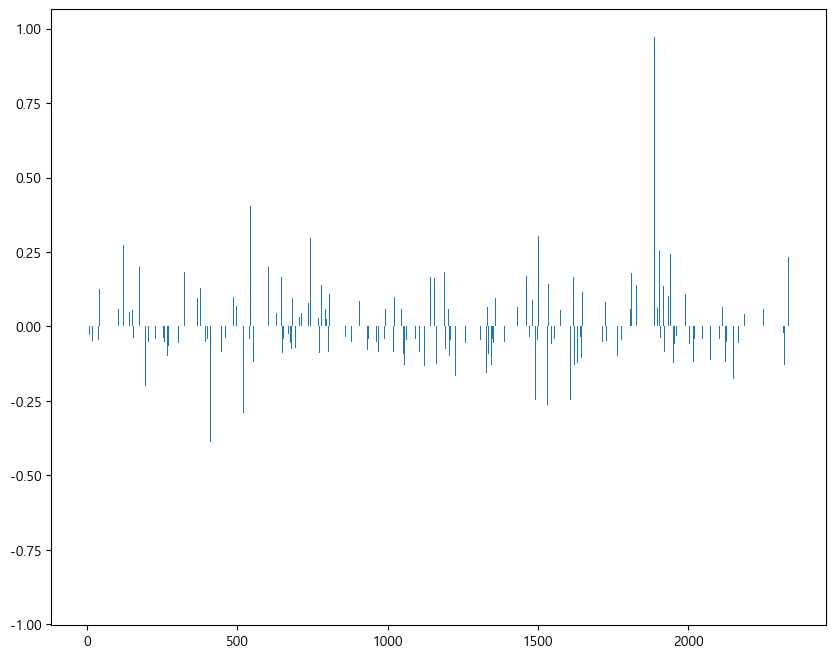

In [151]:
plt.rcParams['figure.figsize']=[10,8]
plt.bar(range(len(lr.coef_[0])),lr.coef_[0])

In [154]:
index_vectorizer.vocabulary_.items() # 숫자와 문자의 위치를 바꿈

dict_items([('너무/Adverb', 411), ('맛있어요/Adjective', 750), ('녹는다/Verb', 430), ('녹아/Verb', 431), ('좋아요/Adjective', 1888), ('흠잡을/Adjective', 2334), ('곳/Noun', 178), ('없는/Adjective', 1470), ('반찬/Noun', 933), ('이/Josa', 1640), ('정갈합니다/Adjective', 1845), ('코로나/Noun', 2075), ('땜/Noun', 642), ('에/Josa', 1492), ('걱정/Noun', 131), ('했는데/Verb', 2281), ('방역/Noun', 945), ('수/Modifier', 1199), ('칙/Noun', 2053), ('도/Josa', 544), ('잘/Verb', 1769), ('지키시고/Verb', 1953), ('살치실이랑/Verb', 1132), ('등심/Noun', 625), ('부드러워서/Adjective', 1022), ('좋아서/Adjective', 1887), ('댓글/Noun', 527), ('남깁니다/Verb', 383), ('살치/Verb', 1131), ('살/Noun', 1127), ('미쳤네요/Adjective', 910), ('대박/Noun', 515), ('입니다/Adjective', 1727), ('퀄리티/Noun', 2081), ('굳이/Noun', 231), ('에요/Josa', 1502), ('최고/Noun', 2030), ('외식/Noun', 1578), ('하기에/Verb', 2179), ('딱/Adverb', 631), ('좋습니다/Adjective', 1885), ('격/Noun', 145), ('자체/Noun', 1764), ('가/Josa', 17), ('다른/Noun', 473), ('음식/Noun', 1630), ('의/Josa', 1633), ('품격/Noun', 2160), ('서비스/Noun', 1163), ('마인

In [155]:
# vectorizer 위치를 바꿈 -  번호로 문자를 찾을 수 있도록
invert_index_vectorizer = {v:k for k,v in index_vectorizer.vocabulary_.items()}

In [156]:
invert_index_vectorizer.items()

dict_items([(411, '너무/Adverb'), (750, '맛있어요/Adjective'), (430, '녹는다/Verb'), (431, '녹아/Verb'), (1888, '좋아요/Adjective'), (2334, '흠잡을/Adjective'), (178, '곳/Noun'), (1470, '없는/Adjective'), (933, '반찬/Noun'), (1640, '이/Josa'), (1845, '정갈합니다/Adjective'), (2075, '코로나/Noun'), (642, '땜/Noun'), (1492, '에/Josa'), (131, '걱정/Noun'), (2281, '했는데/Verb'), (945, '방역/Noun'), (1199, '수/Modifier'), (2053, '칙/Noun'), (544, '도/Josa'), (1769, '잘/Verb'), (1953, '지키시고/Verb'), (1132, '살치실이랑/Verb'), (625, '등심/Noun'), (1022, '부드러워서/Adjective'), (1887, '좋아서/Adjective'), (527, '댓글/Noun'), (383, '남깁니다/Verb'), (1131, '살치/Verb'), (1127, '살/Noun'), (910, '미쳤네요/Adjective'), (515, '대박/Noun'), (1727, '입니다/Adjective'), (2081, '퀄리티/Noun'), (231, '굳이/Noun'), (1502, '에요/Josa'), (2030, '최고/Noun'), (1578, '외식/Noun'), (2179, '하기에/Verb'), (631, '딱/Adverb'), (1885, '좋습니다/Adjective'), (145, '격/Noun'), (1764, '자체/Noun'), (17, '가/Josa'), (473, '다른/Noun'), (1630, '음식/Noun'), (1633, '의/Josa'), (2160, '품격/Noun'), (1163, '서비스/Noun'), (686

In [157]:
print(index_vectorizer.vocabulary_.items())
print(invert_index_vectorizer.items())

dict_items([('너무/Adverb', 411), ('맛있어요/Adjective', 750), ('녹는다/Verb', 430), ('녹아/Verb', 431), ('좋아요/Adjective', 1888), ('흠잡을/Adjective', 2334), ('곳/Noun', 178), ('없는/Adjective', 1470), ('반찬/Noun', 933), ('이/Josa', 1640), ('정갈합니다/Adjective', 1845), ('코로나/Noun', 2075), ('땜/Noun', 642), ('에/Josa', 1492), ('걱정/Noun', 131), ('했는데/Verb', 2281), ('방역/Noun', 945), ('수/Modifier', 1199), ('칙/Noun', 2053), ('도/Josa', 544), ('잘/Verb', 1769), ('지키시고/Verb', 1953), ('살치실이랑/Verb', 1132), ('등심/Noun', 625), ('부드러워서/Adjective', 1022), ('좋아서/Adjective', 1887), ('댓글/Noun', 527), ('남깁니다/Verb', 383), ('살치/Verb', 1131), ('살/Noun', 1127), ('미쳤네요/Adjective', 910), ('대박/Noun', 515), ('입니다/Adjective', 1727), ('퀄리티/Noun', 2081), ('굳이/Noun', 231), ('에요/Josa', 1502), ('최고/Noun', 2030), ('외식/Noun', 1578), ('하기에/Verb', 2179), ('딱/Adverb', 631), ('좋습니다/Adjective', 1885), ('격/Noun', 145), ('자체/Noun', 1764), ('가/Josa', 17), ('다른/Noun', 473), ('음식/Noun', 1630), ('의/Josa', 1633), ('품격/Noun', 2160), ('서비스/Noun', 1163), ('마인

In [159]:
len(lr.coef_[0])

2343

In [167]:
print(lr.coef_[0][:20])

[ 0.         -0.07872818  0.          0.          0.          0.
  0.          0.          0.         -0.028761    0.          0.
  0.          0.          0.3159316  -0.12539455 -0.04470868 -0.2967841
  0.00664157 -0.04824614]


In [ ]:
((value, index) for index,value in enumerate(lr.coef_[0])) # 번호를 추가한 형태

In [160]:
# 2343개의 기울기값 index 부여, 역순정렬

coef_pos_index = sorted(((value, index) for index,value in enumerate(lr.coef_[0])),reverse=True)
coef_pos_index

[(0.9711754855892681, 1888),
 (0.5939468086201407, 2030),
 (0.49648530075240693, 750),
 (0.45647936254881727, 1137),
 (0.4550277903965428, 760),
 (0.4180435470763512, 732),
 (0.4056803373154709, 1956),
 (0.40347565327429324, 544),
 (0.31593160368015616, 14),
 (0.31159351895318554, 731),
 (0.3049379986101859, 1502),
 (0.2960822932967194, 744),
 (0.27446351372620886, 1977),
 (0.271978476641454, 122),
 (0.2549810124840141, 1709),
 (0.2544830262355193, 1904),
 (0.24786978282304764, 749),
 (0.24786978282304764, 34),
 (0.24353274681006176, 1941),
 (0.24353274681006176, 873),
 (0.23317342876960365, 156),
 (0.2326125439370735, 2333),
 (0.23068436162288808, 1619),
 (0.22340545356714184, 1065),
 (0.21787881036612758, 1870),
 (0.20391889465111881, 159),
 (0.20078943911176203, 337),
 (0.1985431962317687, 2068),
 (0.19842929286662625, 604),
 (0.19801419752234553, 175),
 (0.1960608220539002, 2063),
 (0.19487407044706662, 1802),
 (0.19388434531176124, 454),
 (0.19173596875884505, 1037),
 (0.191716240

In [161]:
# 긍정의 표현중에 높은 순으로 출력
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

좋아요/Adjective 0.9711754855892681
최고/Noun 0.5939468086201407
맛있어요/Adjective 0.49648530075240693
삼겹살/Noun 0.45647936254881727
맛있음/Adjective 0.4550277903965428
맛있고/Adjective 0.4180435470763512
직원/Noun 0.4056803373154709
도/Josa 0.40347565327429324
ㅎㅎ/KoreanParticle 0.31593160368015616
맛있게/Adjective 0.31159351895318554
에요/Josa 0.3049379986101859
맛있당/Adjective 0.2960822932967194
짱/Noun 0.27446351372620886
거기/Noun 0.271978476641454
인정/Noun 0.2549810124840141
좋음/Adjective 0.2544830262355193
맛있어여/Adjective 0.24786978282304764
가득가득/Adverb 0.24786978282304764
지려/Verb 0.24353274681006176
무제한/Noun 0.24353274681006176


In [168]:
# 긍정의 표현중에 낮은 순으로 출력
for coef in coef_pos_index[-20:]:
    print(invert_index_vectorizer[coef[1]], coef[0])

보단/Josa -0.24820107752319842
웨이/Noun -0.24846255430014771
인가/Josa -0.25575723722141674
다/Josa -0.25975336644952435
예요/Josa -0.26431501202877444
닥/Noun -0.2725373341987034
대창/Noun -0.2891036674626298
안/VerbPrefix -0.2962530500632603
가/Josa -0.2967840957448279
아쉬워요/Adjective -0.3051820103223431
제일/Noun -0.311806995021673
점/Noun -0.3305381020561932
볶음밥/Noun -0.34474990727124394
그/Determiner -0.37135636191406385
너무/Adverb -0.3886517425566271
은/Josa -0.4031863935914086
곱창/Noun -0.5868718866969688
이에요/Josa -0.606457916721127
보통/Noun -0.617600139997785
별로/Noun -0.9095179021722112


In [166]:
lr.coef_[0][0] # 위의 그래프가 나타내는 값들이 양수

0.0